# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nrclex import NRCLex
import nltk
import nltk.corpus
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package words to /home/codespace/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Data

In [6]:
df = pd.read_csv('/workspaces/tswift_lyrics/p1_lyric_analysis/tswift_lyrics_clean.csv')
df.head()

,Unnamed: 0,Album,Song Name,Lyrics,clean_lyrics,tokenized_lyrics,lemmatized_lyrics
0,0,Taylor Swift,A Perfectly Good Heart,why would you wanna break a perfectly good hea...,"why, would, you, want to, break, a, perfectly,...","['would', 'want', 'break', 'perfectly', 'good'...","['would', 'want', 'break', 'perfectly', 'good'..."
1,1,Taylor Swift,A Place In This World,i dont know what i want so dont ask me cause i...,"i, do not, know, what, i, want, so, do not, as...","['know', 'want', 'ask', 'still', 'trying', 'fi...","['know', 'want', 'ask', 'still', 'trying', 'fi..."
2,2,Taylor Swift,Cold as You,you have a way of coming easily to me and when...,"you, have, a, way, of, coming, easily, to, me,...","['way', 'coming', 'easily', 'take', 'take', 'b...","['way', 'coming', 'easily', 'take', 'take', 'b..."
3,3,Taylor Swift,I'm Only Me When I'm With You,friday night beneath the stars in a field behi...,"friday, night, beneath, the, stars, in, a, fie...","['friday', 'night', 'beneath', 'stars', 'field...","['friday', 'night', 'beneath', 'star', 'field'..."
4,4,Taylor Swift,Invisible,she cant see the way your eyes light up when y...,"she, cannot, see, the, way, your, eyes, light,...","['see', 'way', 'eyes', 'light', 'smile', 'neve...","['see', 'way', 'eye', 'light', 'smile', 'never..."


## Text Cleaning

In [7]:
# define English words and stopwords
english_words = set(words.words())
stop = stopwords.words('english')

In [22]:
# initialize wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

# tokenize 'clean_lyrics' column
tokens = word_tokenize(' '.join(df['clean_lyrics']))

# lemmatize words and filter out stopwords, punctuation, and words less than two letters
filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens
                   if word not in stop
                   and len(word) > 2
                   and word in english_words]

# join tokens into a single string
lyric_words = ' '.join(filtered_tokens)

print(len(lyric_words))
print(lyric_words[:1000])

179367
would want break perfectly good heart would want take love tear apart would want make first scar would want break perfectly good heart maybe seen read writing wall distance would one fall matter say still believe would walk away make sense would want break perfectly good heart would want take love tear apart would want make first scar would want break perfectly good heart unbroken unbroken get back way would want break perfectly good heart would want take love tear apart would want make first scar would want break would want break would want break perfectly good heart would want take love tear apart would want make first scar would want break perfectly good heart know want ask still trying figure know road walking trying see rain coming even though one way alone know ill strong ill wrong life go girl trying find place world got radio old blue jean wearing heart sleeve feeling lucky today got sunshine could tell need mystery yeah alone know ill strong ill wrong life go girl tryin

# Sentiment Analysis

In [9]:
# initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# calculate sentiment scores for entire text
sentiment_score = analyzer.polarity_scores(lyric_words)

# extract individual scores
neg = sentiment_score['neg']
neu = sentiment_score['neu']
pos = sentiment_score['pos']

sentiment_score

{'neg': 0.164, 'neu': 0.55, 'pos': 0.286, 'compound': 1.0}

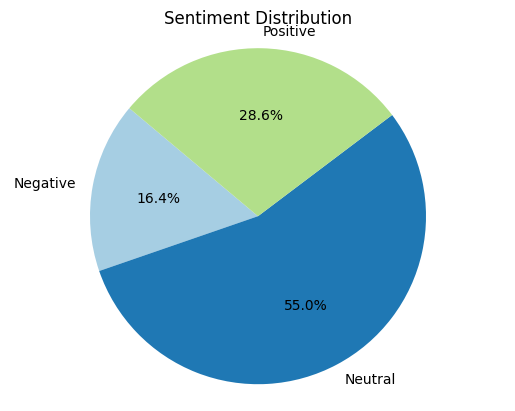

In [10]:
# create labels for pie chart
labels = ['Negative', 'Neutral', 'Positive']

# create sizes for each sentiment category
sizes = [neg, neu, pos]

# plot pie chart
plt.figure()
plt.pie(sizes,
        labels = labels,
        colors = plt.cm.Paired.colors,
        autopct = '%1.1f%%',
        startangle = 140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

In [11]:
# initialize list of word sentiments
word_sentiments = []

# initialize variables to accumulate sentiment scores
pos_score_sum = 0
neg_score_sum = 0
neu_score_sum = 0
pos_count = 0
neg_count = 0
neu_count = 0
total_words = 0

# count occurrences of each sentiment and accumulate sentiment scores
for word in filtered_tokens:
    total_words += 1
    sentiment_score = analyzer.polarity_scores(word)['compound']
    if sentiment_score >= 0.05:
        word_sentiments.append(('Positive', word))
        pos_count += 1
        pos_score_sum += sentiment_score
    elif sentiment_score <= (-0.05):
        word_sentiments.append(('Negative', word))
        neg_count += 1
        neg_score_sum += sentiment_score
    else:
        word_sentiments.append(('Neutral', word))
        neu_count += 1
        neu_score_sum += sentiment_score
    
# calculate avg sentiment score for each emotion
avg_pos_score = pos_score_sum / pos_count if pos_count != 0 else 0
avg_neg_score = neg_score_sum / neg_count if neg_count != 0 else 0
avg_neu_score = neu_score_sum / neu_count if neu_count != 0 else 0
avg_total_score = (pos_score_sum + neg_score_sum + neu_score_sum) / total_words

# print results
print('pos:', pos_count)
print('neg:', neg_count)
print('neu:', neu_count)
print('Total:', total_words)

# Print results with two decimal places
print('Avg. Pos. Score: {:.2f}'.format(avg_pos_score))
print('Avg. Neg. Score: {:.2f}'.format(avg_neg_score))
print('Avg. Neu. Score: {:.2f}'.format(avg_neu_score))
print('Avg. Total Score: {:.2f}'.format(avg_total_score))

pos: 4469
neg: 2654
neu: 23573
Total: 30696
Avg. Pos. Score: 0.39
Avg. Neg. Score: -0.38
Avg. Neu. Score: 0.00
Avg. Total Score: 0.02


In [12]:
# create lists for each word type
all_words = [word for sentiment, word in word_sentiments]
pos_words = [word for sentiment, word in word_sentiments if sentiment == 'Positive']
neg_words = [word for sentiment, word in word_sentiments if sentiment == 'Negative']
neu_words = [word for sentiment, word in word_sentiments if sentiment == 'Neutral']

# count occurrences of each word type
# only show top 300
word_counts = pd.Series(all_words).value_counts().head(250)
pos_word_counts = pd.Series(pos_words).value_counts().head(250)
neg_word_counts = pd.Series(neg_words).value_counts().head(250)
neu_word_counts = pd.Series(neu_words).value_counts().head(250)

# create dataframe to display the top of each word type
data = {
    'All Words': word_counts.index,
    'All Counts': word_counts.values,
    'Pos Words': pos_word_counts.index,
    'Pos Counts': pos_word_counts.values,
    'Neg Words': neg_word_counts.index,
    'Neg Counts': neg_word_counts.values,
    'Neu Words': neu_word_counts.index,
    'Neu Counts': neu_word_counts.values
    }

df_word_types = pd.DataFrame(data)
df_word_types.columns = ['All Words', 'All Counts', 'Pos Words', 'Pos Counts', 'Neg Words', 'Neg Counts', 'Neu Words', 'Neu Counts']

df_word_types.head()

,All Words,All Counts,Pos Words,Pos Counts,Neg Words,Neg Counts,Neu Words,Neu Counts
0,like,668,like,668,ill,208,know,580
1,know,580,want,415,bad,123,never,430
2,never,430,love,408,leave,79,time,410
3,want,415,yeah,194,shake,75,one,358
4,time,410,good,135,miss,75,would,327


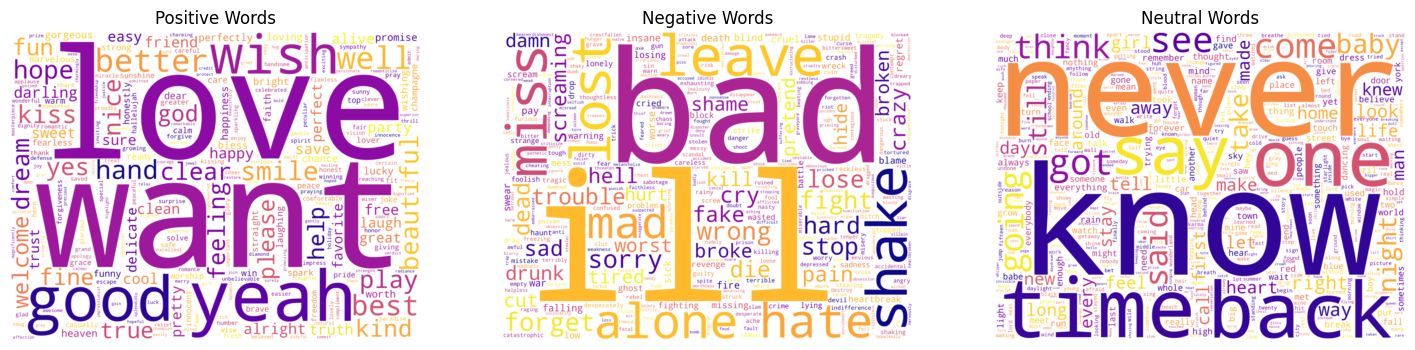

In [13]:
# generate wordclouds for each sentiment type
wordclouds = {}

for sentiment_type in ['Positive', 'Negative', 'Neutral']:
    words = [word[1] for word in word_sentiments if word[0] == sentiment_type]
    if words:
        wordcloud = WordCloud(relative_scaling=0.3,
                              min_font_size=1,
                              background_color='white',
                              width=1024,
                              height=768,
                              max_words=500,
                              colormap='plasma',
                              scale=3,
                              font_step=4,
                              collocations=False,
                              margin=5).generate(' '.join(words))
        wordclouds[sentiment_type] = wordcloud

# display wordclouds
plt.figure(figsize=(18, 6))
for i, sentiment_type in enumerate(['Positive', 'Negative', 'Neutral']):
    if sentiment_type in wordclouds:
        plt.subplot(1, 3, i+1)
        plt.imshow(wordclouds[sentiment_type], interpolation='bilinear')
        plt.title(sentiment_type + ' Words')
        plt.axis('off')
plt.show()

# note: does not show 'like'

## NRCLex

In [14]:
# emotion classification
lyric_emot = NRCLex(lyric_words)
lyric_emot.affect_frequencies

{'fear': 0.08980252847142409,
 'anger': 0.07141364538710689,
 'anticip': 0.0,
 'trust': 0.08682478319924773,
 'surprise': 0.055532337268832936,
 'positive': 0.17297043151185873,
 'negative': 0.14773795841604848,
 'sadness': 0.09528784870964371,
 'disgust': 0.057047330477484066,
 'joy': 0.11994566920906906,
 'anticipation': 0.1034374673492843}

In [15]:
# most common emotion
lyric_emot.top_emotions

[('positive', 0.17297043151185873)]

In [16]:
# total no. of words
tot_words = len(lyric_emot.words)
print('Total words in the text:', tot_words)

Total words in the text: 30696


In [17]:
# create dataframe
sentiment_scores = pd.DataFrame(list(lyric_emot.raw_emotion_scores.items()))
sentiment_scores = sentiment_scores.rename(columns={0: 'Sentiment', 1: 'Count'})
sentiment_scores

,Sentiment,Count
0,surprise,1063
1,anticipation,1980
2,joy,2296
3,positive,3311
4,trust,1662
5,anger,1367
6,disgust,1092
7,fear,1719
8,negative,2828
9,sadness,1824


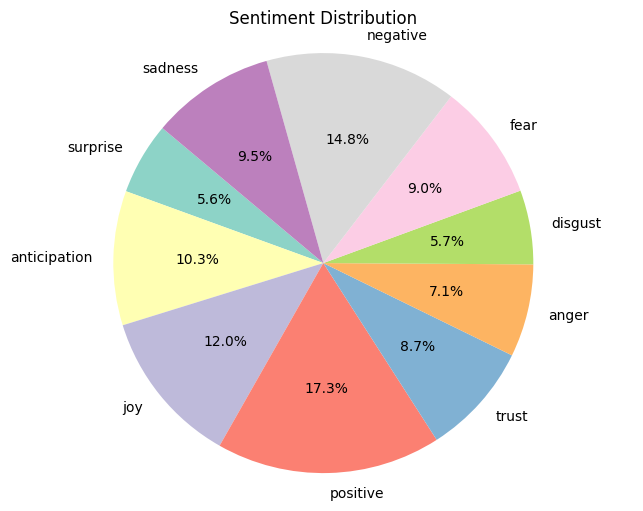

In [18]:
# pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_scores['Count'],
        labels=sentiment_scores['Sentiment'],
        colors=plt.cm.Set3.colors,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

In [19]:
# define colormaps for each sentiment
sentiment_cmaps = {
    'fear': 'twilight',
    'anger': 'jet',
    'anticipation': 'twilight',
    'trust': 'ocean',
    'surprise': 'gnuplot2',
    'positive': 'hsv',
    'negative': 'spring',
    'sadness': 'PiYG',
    'disgust': 'gist_heat',
    'joy': 'gist_ncar'
    }

# all unique sentiments in the text
unique_sentiments = list(set(sentiment for emotions
                            in lyric_emot.affect_dict.values()
                            for sentiment in emotions))

/tmp/ipykernel_2855/1762225096.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(word_counts.index)
/tmp/ipykernel_2855/1762225096.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(word_counts.index)
/tmp/ipykernel_2855/1762225096.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(word_counts.index)
/tmp/ipykernel_2855/1762225096.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(word_counts.index)
/tmp/ipykernel_2855/1762225096.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoc

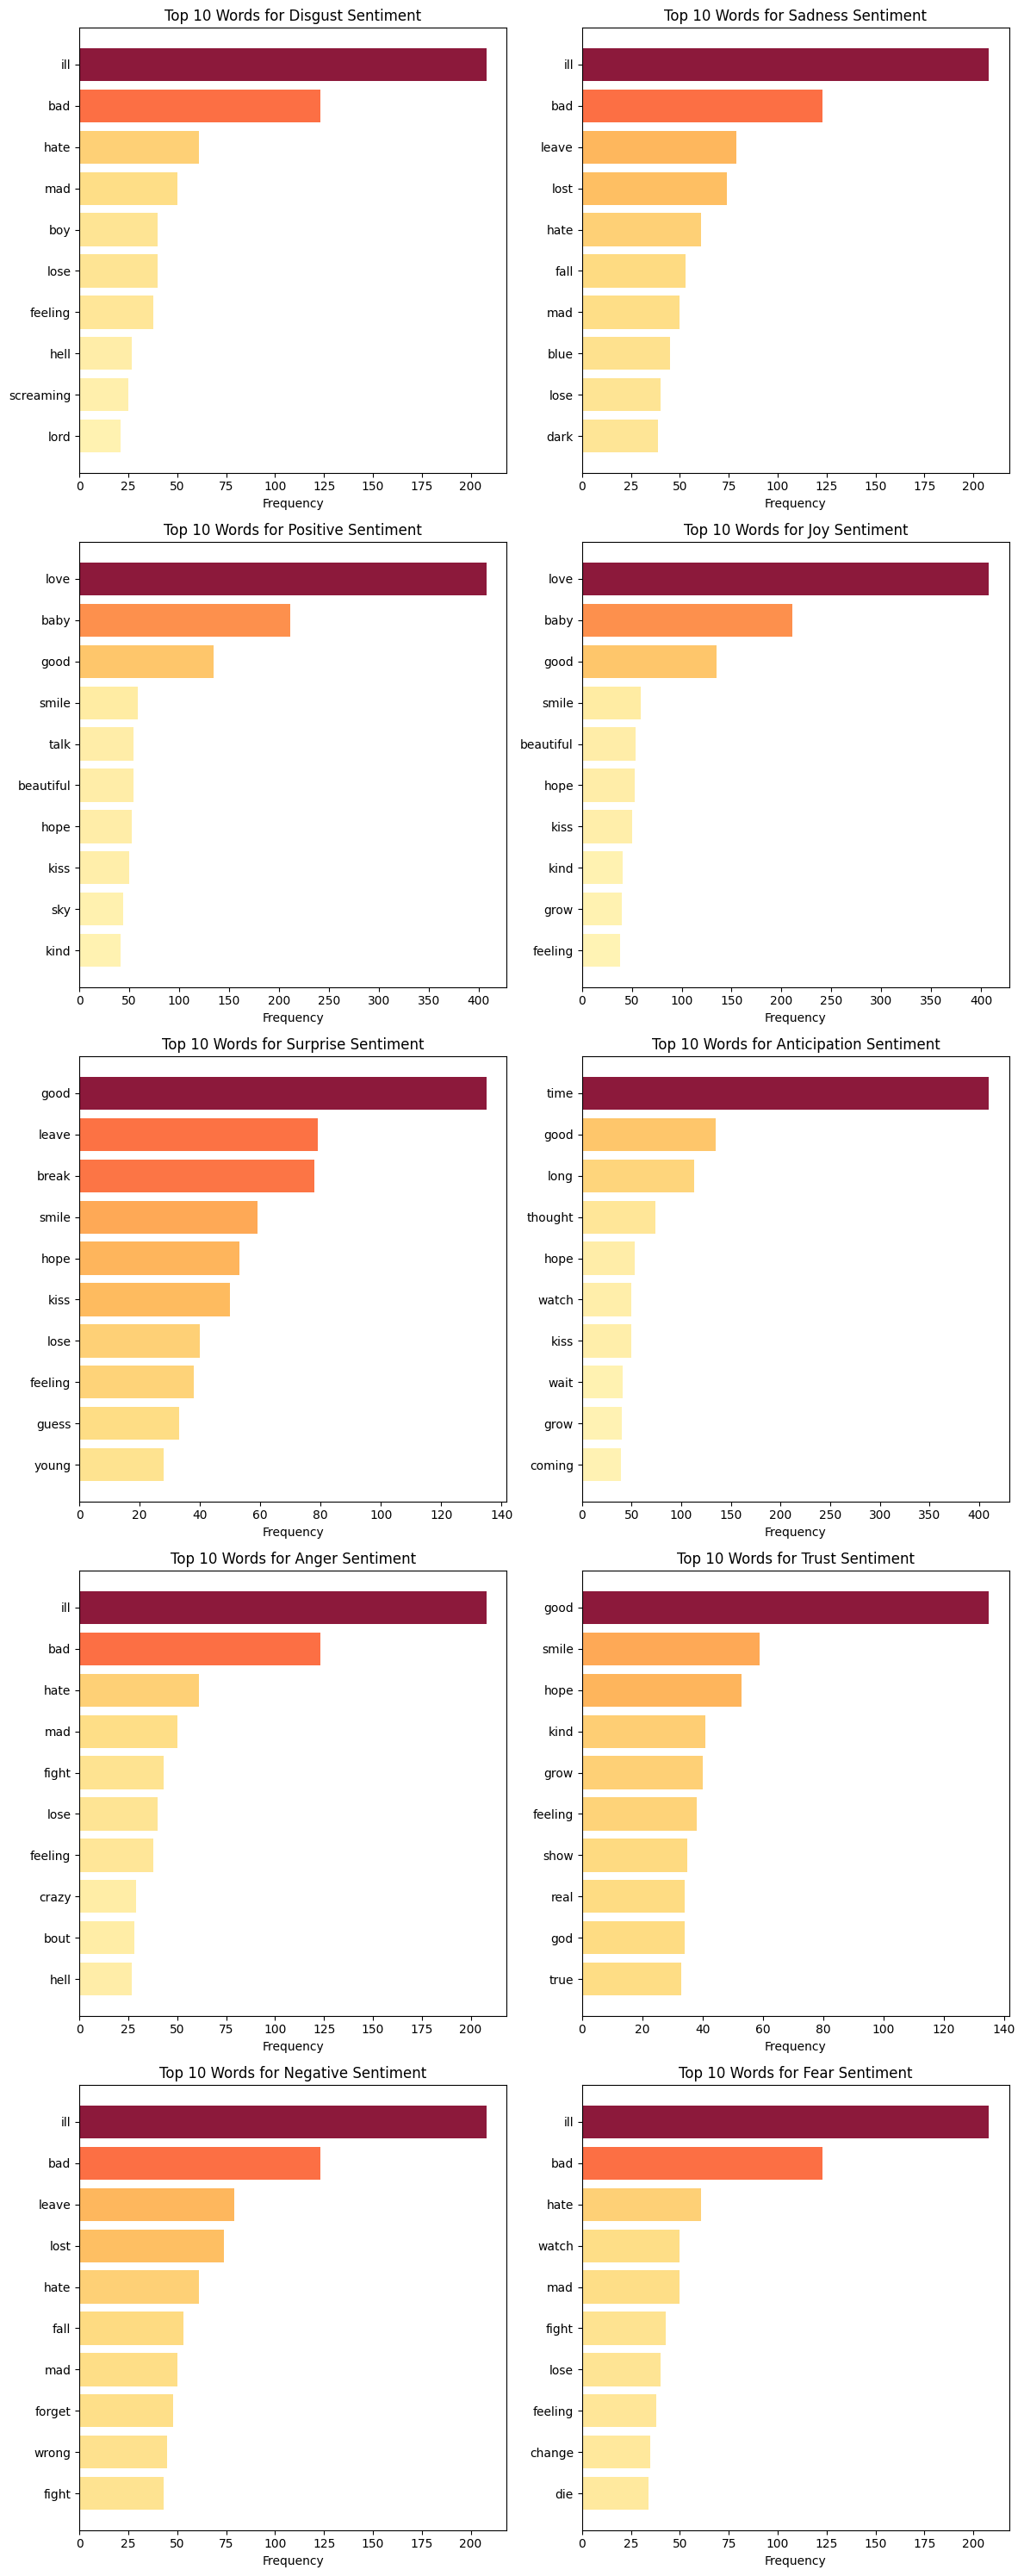

In [20]:
# create pandas Series from the list of filtered tokens
word_series = pd.Series(filtered_tokens)

# create dictionary to store word frequencies for each sentiment
sentiment_word_counts = {}

# calculate word frequencies for each sentiment
for sentiment in unique_sentiments:
    words_for_sentiment = [word for word, emotions in lyric_emot.affect_dict.items() if sentiment in emotions]
    sentiment_word_counts[sentiment] = word_series[word_series.isin(words_for_sentiment)].value_counts().head(10)

# plot bar graph for each sentiment
num_rows = len(unique_sentiments) // 2 + (1 if len(unique_sentiments) % 2 != 0 else 0)
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 6))
axs = axs.ravel()

for i, sentiment in enumerate(unique_sentiments):
    word_counts = sentiment_word_counts[sentiment]
    axs[i].barh(word_counts.index, word_counts.values, color=plt.cm.YlOrRd(word_counts.values / max(word_counts.values)), alpha=0.9)
    axs[i].set_title(f'Top 10 Words for {sentiment.capitalize()} Sentiment')
    axs[i].set_xlabel('Frequency')
    axs[i].tick_params(axis='y')
    axs[i].set_yticklabels(word_counts.index)
    axs[i].invert_yaxis()

# hide remaining empty subplots
for j in range(len(unique_sentiments), num_rows * num_cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

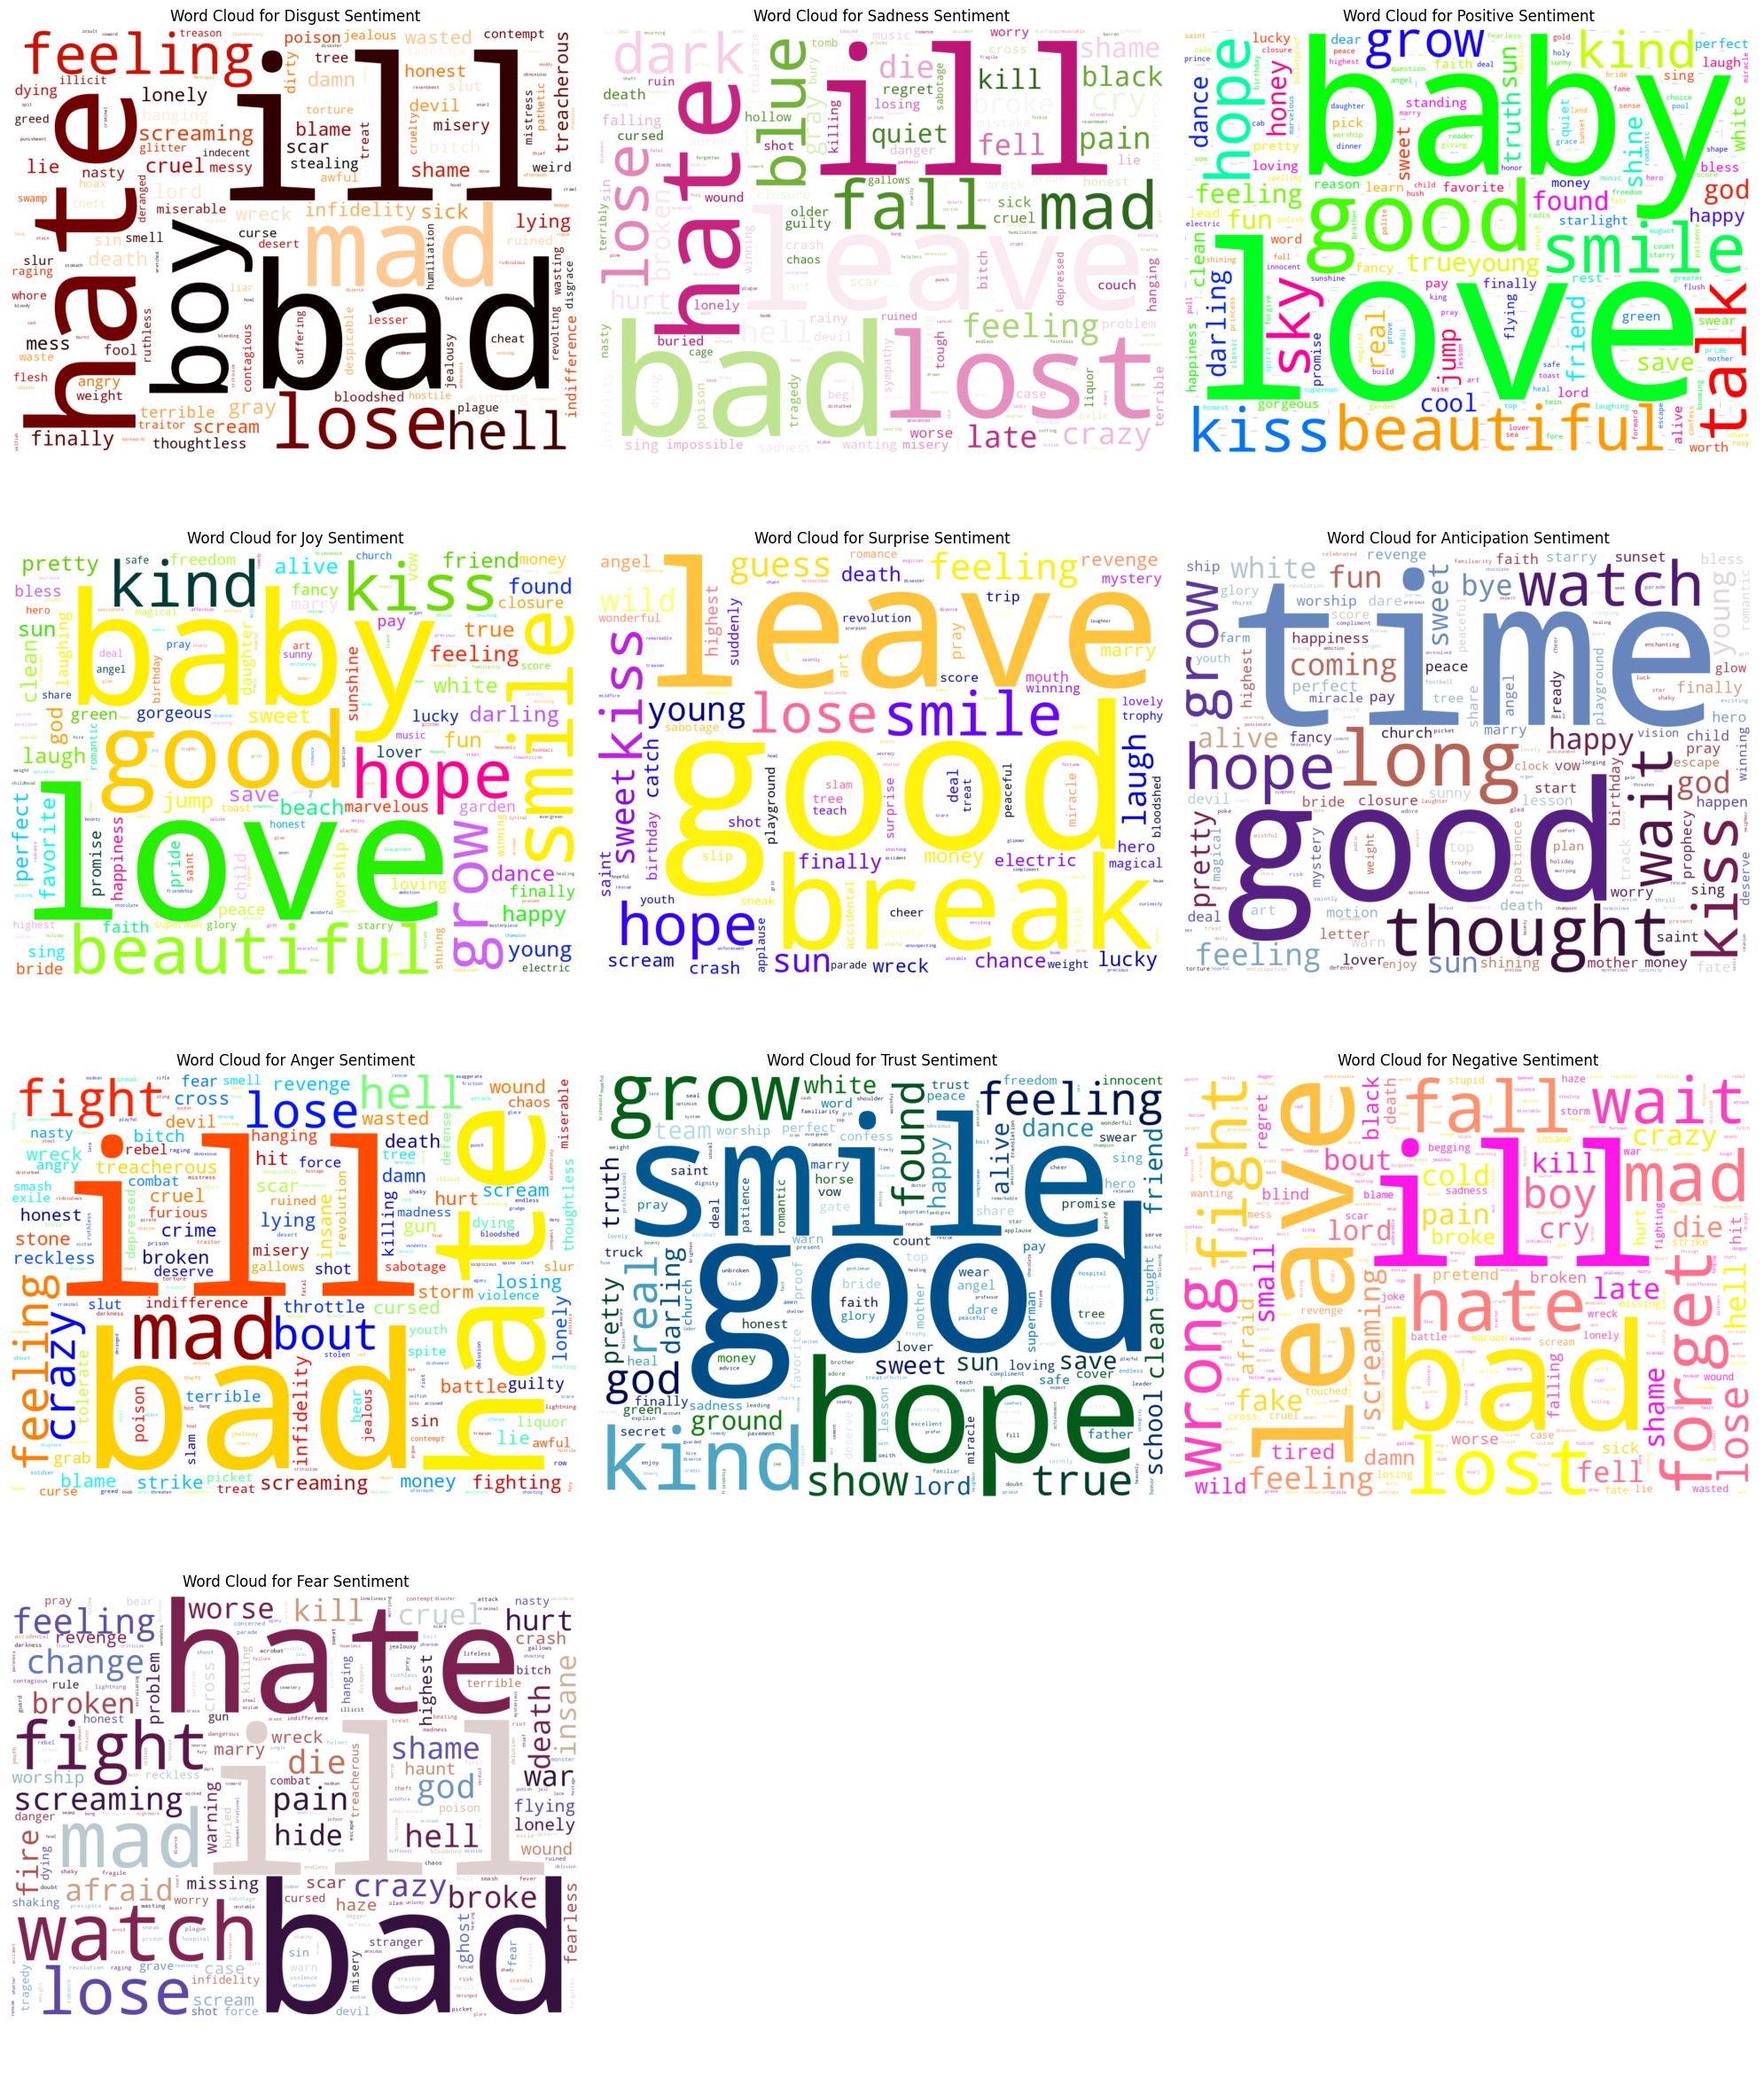

In [21]:
# determine no. of rows and columns needed
num_rows = len(unique_sentiments) // 3 + (1 if len(unique_sentiments) % 3 != 0 else 0)
num_cols = 3

# create subplots with 3 columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))

# flatten the axis array
axs = np.ravel(axs)

# calculate word frequencies for each sentiment
for sentiment in unique_sentiments:
    words_for_sentiment = [word for word, emotions in lyric_emot.affect_dict.items() if sentiment in emotions]
    sentiment_word_counts[sentiment] = word_series[word_series.isin(words_for_sentiment)].value_counts()

    
# create wordcloud for each sentiment
for i, sentiment in enumerate(unique_sentiments):
    words_for_sentiment = [word for word, emotions in lyric_emot.affect_dict.items() if sentiment in emotions]
    word_counts = sentiment_word_counts[sentiment]

    # create wordcloud
    wordcloud = WordCloud(
        relative_scaling=0.3,
        min_font_size=1,
        background_color='white',
        width=400,
        height=300,
        max_words=500,
        colormap=sentiment_cmaps.get(sentiment),
        scale=3,
        font_step=4,
        collocations=False,
        margin=5
        )

    # generate wordcloud
    wordcloud.generate_from_frequencies(word_counts.to_dict())

    # display wordcloud in the respective subplot
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    axs[i].axis('off')

# hide remaining empty subplots
for j in range(len(unique_sentiments), num_rows * num_cols):
    axs[j].axis('off')

# adjust layout
plt.tight_layout()
plt.show()